In [1]:
import numpy as np
import pandas as pd
import ROOT
import matplotlib.pyplot as plt

%config Completer.use_jedi = False

Welcome to JupyROOT 6.22/06


In [2]:
def rootToNumpy(hist, is_2d=False):
    # Turn root histogram into numpy array                                                                                                                                                                         
    new_hist = []
    if not is_2d:
        for i in range(hist.GetNbinsX()):
            new_hist.append(hist.GetBinContent(i+1))
    else:
        for j in range(hist.GetNbinsY()):
            row = []
            for i in range(hist.GetNbinsX()):
                row.append(hist.GetBinContent(i+1, j+1))
            new_hist.append(row)

    return np.array(new_hist)

In [3]:
rfile = ROOT.TFile('input_root/FoldedHistograms.root', 'READ')

In [7]:
rfile.cd('nominal')
rfile.ls()

TFile**		input_root/FoldedHistograms.root	
 TFile*		input_root/FoldedHistograms.root	
  TDirectoryFile*		nominal	nominal
   KEY: TH1D	em_ttbar_bin_0;1	newh
   KEY: TH1D	em_ttbar_bin_1;1	newh
   KEY: TH1D	em_ttbar_bin_2;1	newh
   KEY: TH1D	em_ttbar_bin_3;1	newh
   KEY: TH1D	em_ttbar_bin_4;1	newh
   KEY: TH1D	em_ttbar_PowPy8_atlfast_bin_0;1	newh
   KEY: TH1D	em_ttbar_PowPy8_atlfast_bin_1;1	newh
   KEY: TH1D	em_ttbar_PowPy8_atlfast_bin_2;1	newh
   KEY: TH1D	em_ttbar_PowPy8_atlfast_bin_3;1	newh
   KEY: TH1D	em_ttbar_PowPy8_atlfast_bin_4;1	newh
   KEY: TH1D	ee_ttbar_bin_0;1	newh
   KEY: TH1D	ee_ttbar_bin_1;1	newh
   KEY: TH1D	ee_ttbar_bin_2;1	newh
   KEY: TH1D	ee_ttbar_bin_3;1	newh
   KEY: TH1D	ee_ttbar_bin_4;1	newh
   KEY: TH1D	ee_ttbar_PowPy8_atlfast_bin_0;1	newh
   KEY: TH1D	ee_ttbar_PowPy8_atlfast_bin_1;1	newh
   KEY: TH1D	ee_ttbar_PowPy8_atlfast_bin_2;1	newh
   KEY: TH1D	ee_ttbar_PowPy8_atlfast_bin_3;1	newh
   KEY: TH1D	ee_ttbar_PowPy8_atlfast_bin_4;1	newh
   KEY: TH1D	mm_ttbar_bin_0;1

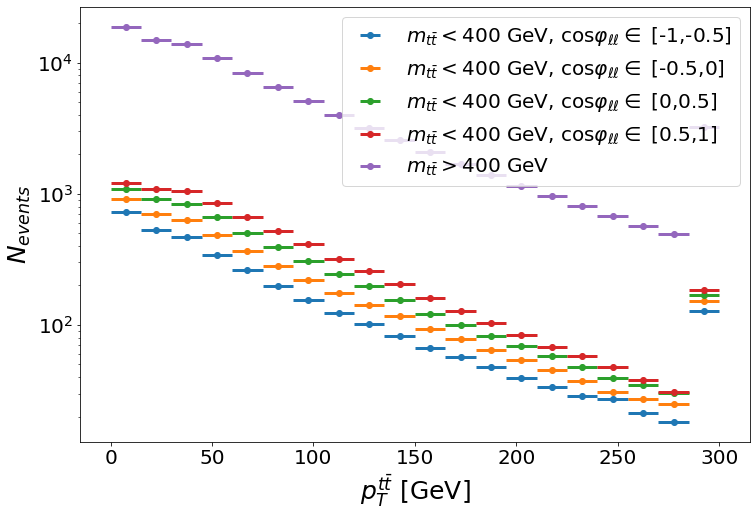

In [70]:
channel = 'mm'
nbins = 5
bin_labels = [
    '$m_{t\\bar{t}}<400$ GeV, cos$\\varphi_{\\ell\\ell}\\in$ [-1,-0.5]',
    '$m_{t\\bar{t}}<400$ GeV, cos$\\varphi_{\\ell\\ell}\\in$ [-0.5,0]',
    '$m_{t\\bar{t}}<400$ GeV, cos$\\varphi_{\\ell\\ell}\\in$ [0,0.5]',
    '$m_{t\\bar{t}}<400$ GeV, cos$\\varphi_{\\ell\\ell}\\in$ [0.5,1]',
    '$m_{t\\bar{t}}>400$ GeV'
]
bin_edges = np.arange(7.5, 300, 15)
xlabel = '$p_T^{t\\bar{t}}$ [GeV]'

hist_list = []
for b in range(nbins):
    hist_list.append( rootToNumpy(rfile.Get(f'nominal/{channel}_ttbar_bin_{b}')) )
plotHists(channel, 'PTttbar', hist_list, binning, xlabel, bin_labels)

In [45]:
np.diff(np.arange(7.5, 300, 15))

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15.])

In [67]:
def plotHists(channel, var, h_list, binning, xlabel, bin_labels):
    plt.figure(figsize=(12,8))
    for ih, h in enumerate(h_list):
        plt.errorbar(binning, h, xerr=7.5, fmt='o', label=bin_labels[ih])
    plt.legend()
    plt.ylabel('$N_{events}$')
    plt.xlabel(xlabel)
    plt.savefig(f'results/folded_histograms/folded_{var}_{channel}_lin.pdf')
    plt.yscale('log')
    plt.savefig(f'results/folded_histograms/folded_{var}_{channel}_log.pdf')


In [19]:
h = rfile.Get(f'nominal/mm_ttbar_bin_0')

<ErrorbarContainer object of 3 artists>

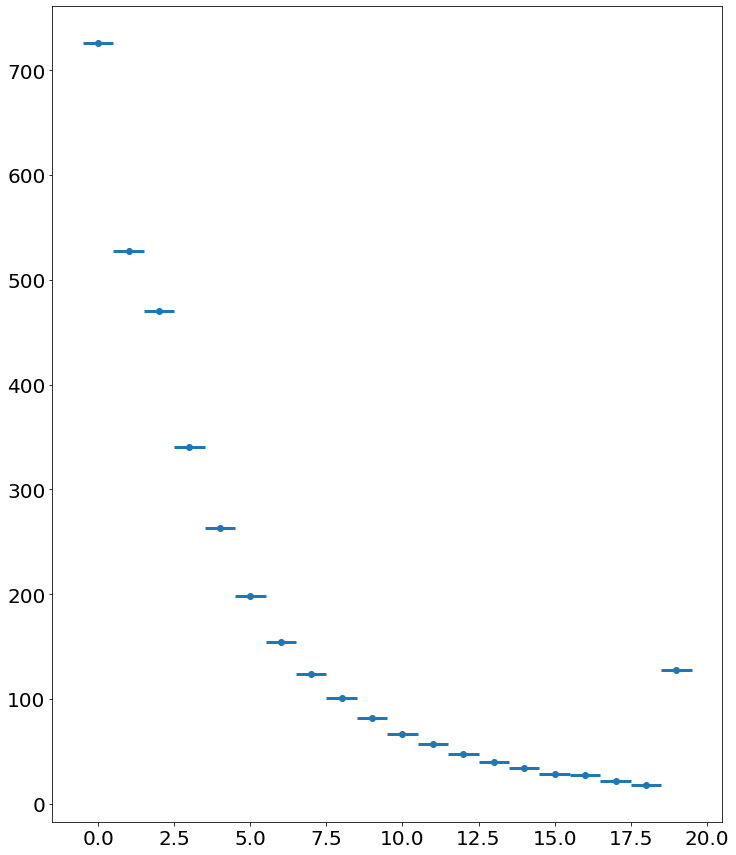

In [23]:
plt.errorbar(range(h.GetNbinsX()), rootToNumpy(h), xerr=0.5, fmt='o')